In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


C:\Users\top kek\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [42]:
df_temp = pd.read_csv("ADBE.CSV",index_col="date")
df_temp["adjClose"].dropna(inplace=True)
df_prices = df_temp["adjClose"]
df_volumes = df_temp["volume"]
df_returns = np.log(df_prices.shift(0))-np.log(df_prices.shift(-1))


In [29]:
period_days = len(df_returns)
vola = df_returns.std() * (252/period_days) ** 0.5
d_quick_stats = {"mean" : df_returns.mean(),"vola" : vola, "skew" : df_returns.skew(), "kurt" : df_returns.kurt(), "std" : df_returns.std() ,"period (days)" : period_days}
d_quick_stats

{'mean': -0.0019183395701478925,
 'vola': 0.03711538295640723,
 'skew': -2.9605691181798983,
 'kurt': 17.17489579802424,
 'std': 0.02290811170119826,
 'period (days)': 96}

In [47]:
df_prices.sort_index(ascending=True, inplace=True)

date
2024-05-17    2152416
2024-05-16    2562865
2024-05-15    3491638
2024-05-14    4287846
2024-05-13    2458192
               ...   
2024-01-08    2829955
2024-01-05    1923240
2024-01-04    2092099
2024-01-03    2478008
2024-01-02    2840192
Name: volume, Length: 96, dtype: int64

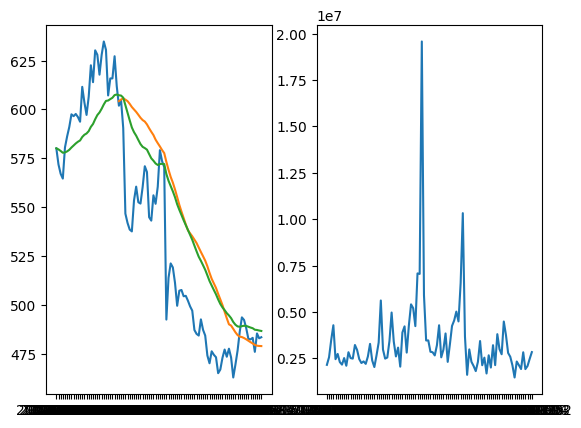

In [48]:
plt.subplot(121).plot(df_prices)
plt.subplot(121).plot(df_prices.rolling(window=30).mean())
plt.subplot(121).plot(df_prices.ewm(span=30, adjust=False).mean())
plt.subplot(122).plot(df_volumes)

In [60]:
vwap = (df_volumes * df_prices).sum() / df_volumes.sum()
last_close = df_prices.iloc[-1]
last_close, vwap

(483.43, 534.5432313447922)

In [87]:
df_vwap = df_volumes.cumsum()

TypeError: unsupported operand type(s) for *: 'Rolling' and 'Rolling'

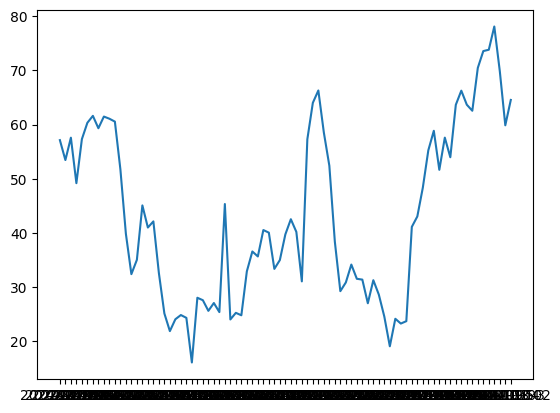

In [85]:
#rsi calcs

df_gains = df_returns.where(df_returns>0,0).rolling(window = 14).mean()
df_loss = df_returns.where(df_returns<0,0).abs().rolling(window = 14).mean()

rsi = 100 - (100/(1+df_gains/df_loss))
rsi.dropna(inplace=True)